[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/majisoubhik01/Phishing-Classifier/blob/main/Phishing%20Classification.ipynb)

## Performing EDA

In [2]:
# Importing libraries for EDA
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plot
import seaborn as sns

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("phising.csv")
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


Data Description:

The dataset consists of different columns with information regarding whether a website is a phising website or not.

The columns are :

having_IP_Address [-1  1] 

URL_Length [ 1  0 -1]

Shortining_Service [ 1 -1]

having_At_Symbol [ 1 -1]

double_slash_redirecting [-1  1]

Prefix_Suffix [-1  1]

having_Sub_Domain [-1  0  1]

SSLfinal_State [-1  1  0]

Domain_registeration_length [-1  1]

Favicon [ 1 -1]

port [ 1 -1]

HTTPS_token [-1  1]

Request_URL [ 1 -1]

URL_of_Anchor [-1  0  1]

Links_in_tags [ 1 -1  0]

SFH [-1  1  0]

Submitting_to_email [-1  1]

Abnormal_URL [-1  1]

Redirect [0 1]

on_mouseover [ 1 -1]

RightClick [ 1 -1]

popUpWidnow [ 1 -1]

Iframe [ 1 -1]

age_of_domain [-1  1]

DNSRecord [-1  1]

web_traffic [-1  0  1]

Page_Rank [-1  1]

Google_Index [ 1 -1]

Links_pointing_to_page [ 1  0 -1]

Statistical_report [-1  1]

Result [-1  1]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [5]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's check if there are any missing values:

In [6]:
data.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWindow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

Great! There are no missing values.

Also, the data already contains categorical values encoded. So we don't need to do that.

let's see the data distribution of the respective columns:

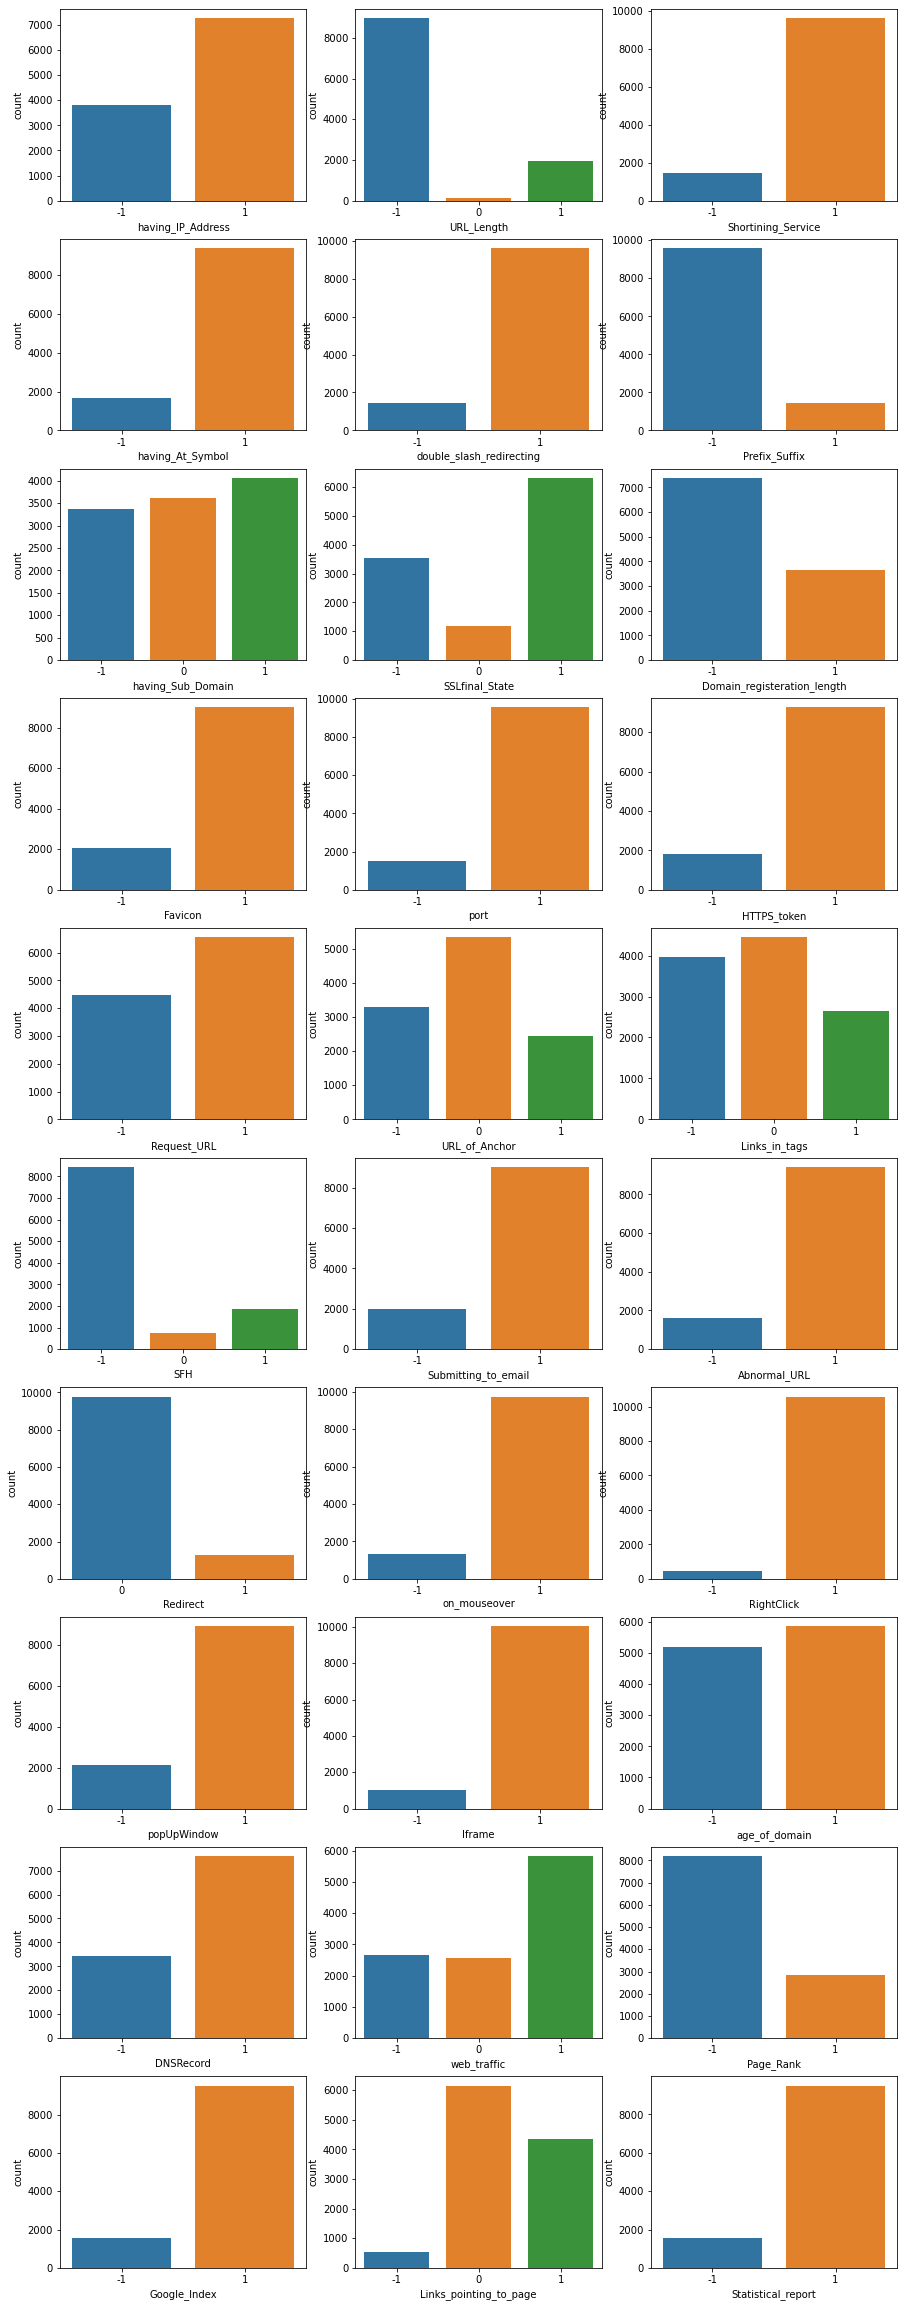

In [7]:
plot.figure(figsize=(15,50), facecolor='white')
plotnumber =1

for column in data.drop(['Result'],axis=1):
    ax = plot.subplot(12,3,plotnumber)
    sns.countplot(data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

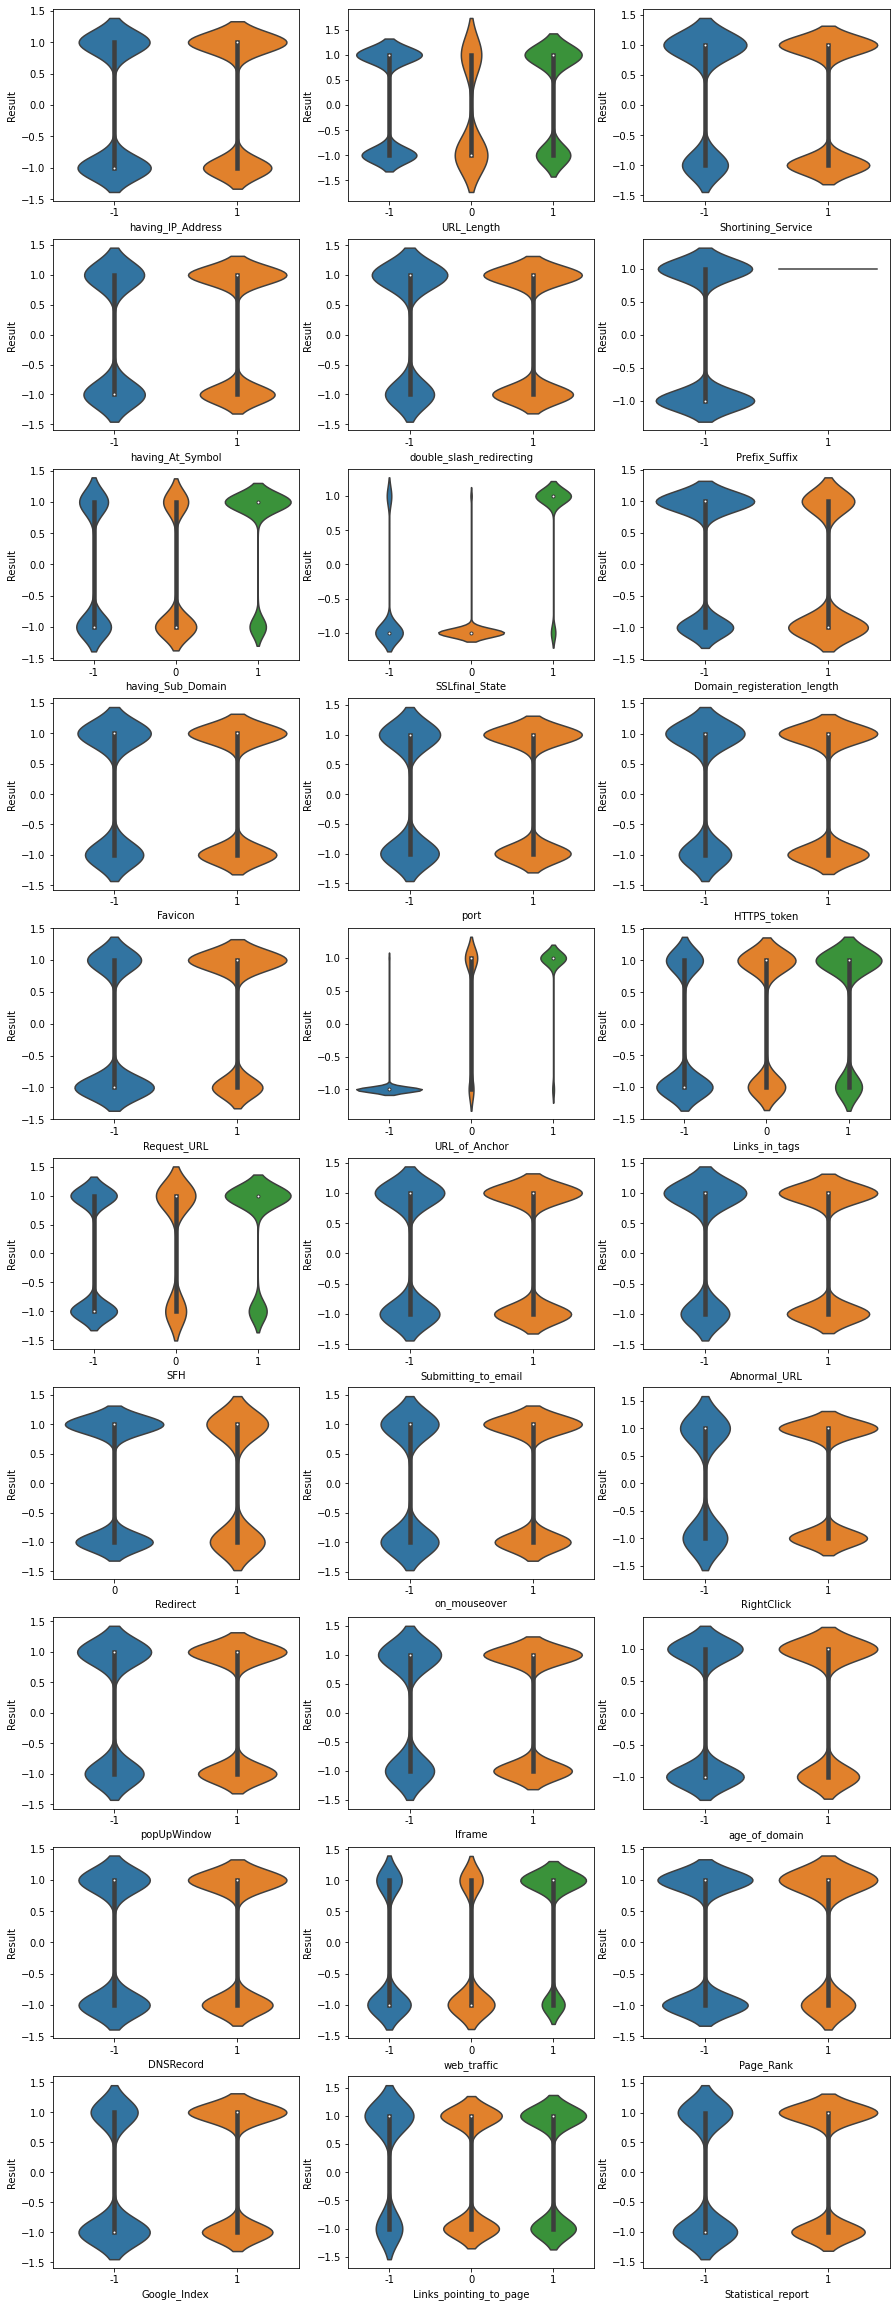

In [8]:
plot.figure(figsize=(15,50), facecolor='white')
plotnumber =1

for column in data.drop(['Result'],axis=1):
    ax = plot.subplot(12,3,plotnumber)
    sns.violinplot(data= data,x=data[column],y =data["Result"] )
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

Correlation between all the variables.

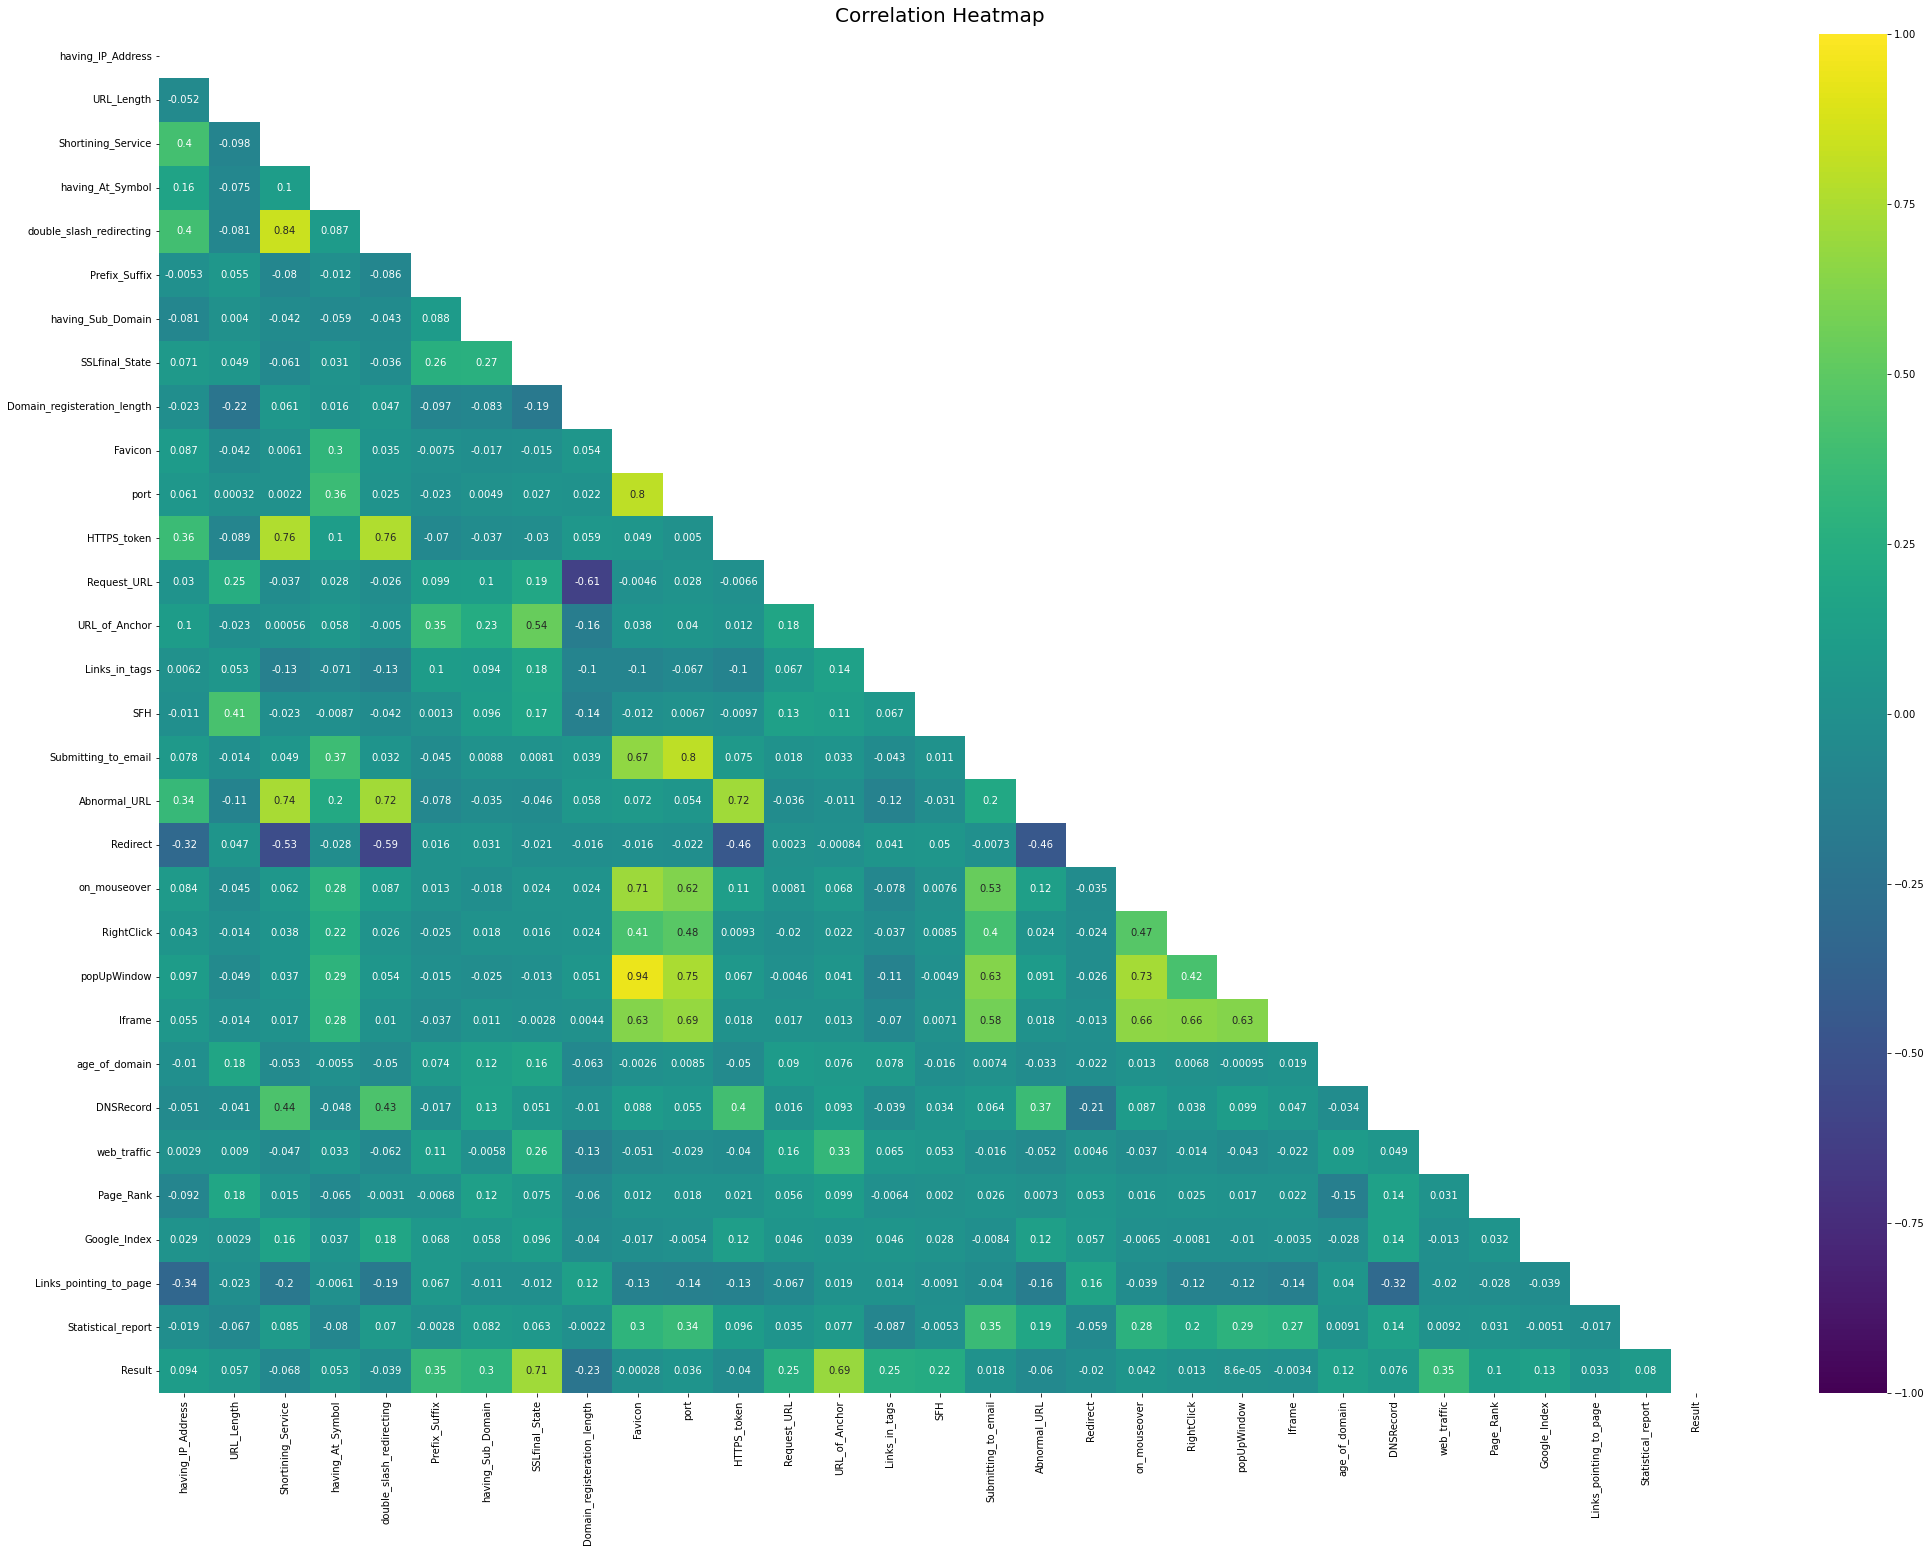

In [9]:
plot.figure(figsize=(35, 25))
corr = data.corr()
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(corr, mask = mask, vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);
plot.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Variables with the highest correlation with the target variable.

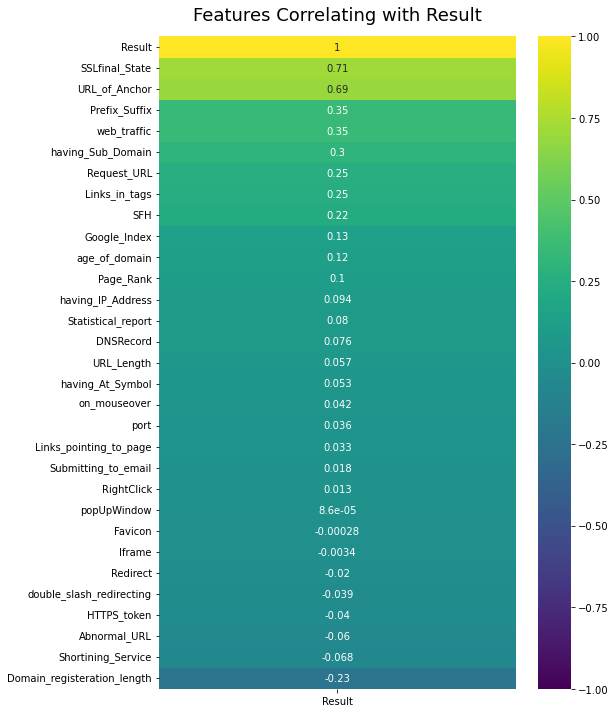

In [10]:
plot.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plot.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

Well the data looks decently distributed from the violin plot above.

Let's check how balanced our dataset is:

<AxesSubplot:xlabel='Result', ylabel='count'>

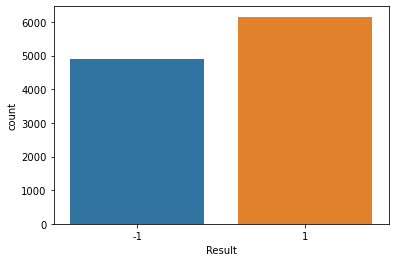

In [11]:
sns.countplot(data['Result'])

Great! our dataset is balanced. 

We can go ahead with training our models.

 ## Splitting the dataset into training and testing data


In [12]:
#Splitting Data

from sklearn.model_selection import train_test_split, KFold, cross_val_score
X = data.drop('Result', axis = 1)
y = data['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Using 3 popular classification techniques for training and testing on the data
1. K Neighbours
2. Decision Tree
3. Naive Bayes
4. Random Forest Classifier

In [13]:
kf = KFold(n_splits=5)

In [14]:
classifiers = []
rs = 42

classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier(random_state = rs))
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier())
classifiers.append(LogisticRegression())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kf, n_jobs=5))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans":cv_means,
    "CrossValerrors": cv_std,
    "Algorithm":["KNeighbors","DecisionTree","Naive Bayes","Random Forest","Logistic Regression"]})
cv_res.sort_values(by = 'CrossValMeans', ascending = False)

,CrossValMeans,CrossValerrors,Algorithm
3,0.969371,0.003393,Random Forest
1,0.955673,0.002995,DecisionTree
0,0.938227,0.004892,KNeighbors
4,0.929828,0.007463,Logistic Regression
2,0.608426,0.006459,Naive Bayes


## Choosing best parameters for the models

In [15]:
%%time
from sklearn.model_selection import GridSearchCV
# Decision Tree
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': range(1,25),
              'min_samples_split': range(2,15),
              'min_samples_leaf': range(1,10),
              'criterion' :['gini', 'entropy']
             }

tree_clas = DecisionTreeClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, n_jobs = -1, verbose=True)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 16848 candidates, totalling 84240 fits
{'criterion': 'entropy', 'max_depth': 23, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.9493395569318961
Wall time: 2min 10s


In [16]:
%%time
# K Neighbors
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range)

knc = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knc, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

knc_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 29 candidates, totalling 145 fits
{'n_neighbors': 1}
0.9506324652699482
Wall time: 33.9 s


In [17]:
%%time
# Naive Bayes
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb = GaussianNB()
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

dt_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.2848035868435802}
0.9117344731571817
Wall time: 3.3 s


## Training Models with best parameters

### Decision Tree Classifier

In [18]:
from sklearn.metrics import accuracy_score
dtc_best = DecisionTreeClassifier(criterion= 'entropy', max_depth= 23, max_features='auto', min_samples_leaf= 1, min_samples_split= 3,random_state=rs)
dtc_best.fit(X_train, y_train)
y_pred = dtc_best.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9536


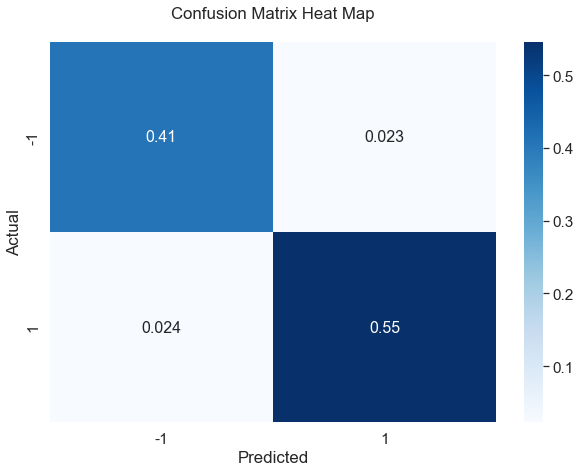

In [19]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plot.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plot.title("Confusion Matrix Heat Map\n")
plot.savefig('ConfusionMatrix_DT', dpi=300, bbox_inches='tight')

In [20]:
target_names = ['Phishing', 'Legitimate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.95      0.95      0.95      1428
  Legitimate       0.96      0.96      0.96      1889

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [21]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# False Positive Rate
fpr_dtc = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(fpr_dtc))

False Positive Rate : 0.0403


### KNN Classifier

In [22]:
knc_best = KNeighborsClassifier(n_neighbors=1)
knc_best.fit(X_train, y_train)
y_pred = knc_best.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9539


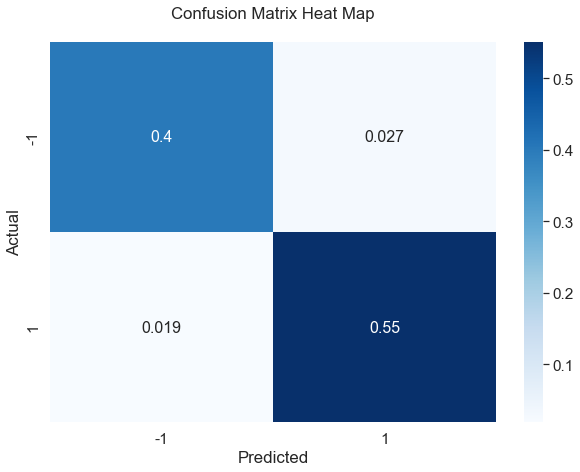

In [23]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plot.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plot.title("Confusion Matrix Heat Map\n")
plot.savefig('ConfusionMatrix_KNN', dpi=300, bbox_inches='tight')

In [24]:
target_names = ['Phishing', 'Legitimate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.96      0.94      0.95      1428
  Legitimate       0.95      0.97      0.96      1889

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



In [25]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# False Positive Rate
fpr_knn = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(fpr_knn))

False Positive Rate : 0.0474


### Naive Bayes Classifier

In [26]:
gnb_best = GaussianNB(var_smoothing= 0.2848035868435802)
gnb_best.fit(X_train, y_train)
y_pred = gnb_best.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8975


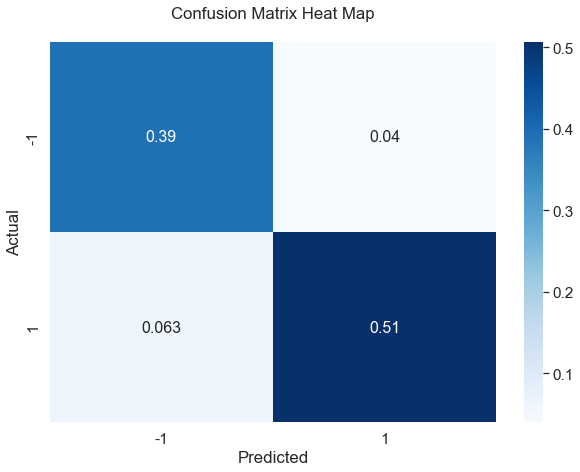

In [27]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plot.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plot.title("Confusion Matrix Heat Map\n")
plot.savefig('ConfusionMatrix_NB', dpi=300, bbox_inches='tight')

In [28]:
target_names = ['Phishing', 'Legitimate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.86      0.91      0.88      1428
  Legitimate       0.93      0.89      0.91      1889

    accuracy                           0.90      3317
   macro avg       0.89      0.90      0.90      3317
weighted avg       0.90      0.90      0.90      3317



In [29]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# False Positive Rate
fpr_nb = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(fpr_nb))

False Positive Rate : 0.0728


### Random Forest Classifier

In [30]:
# Using best hyperparams for decision tree as hyperparams for random forest
rfc = RandomForestClassifier(n_estimators = 100, criterion= 'entropy', max_depth= 23, max_features='auto', min_samples_leaf= 1, min_samples_split= 3,random_state=rs)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.9680


Hyperparameter tuning for Random Forest Classifier

In [31]:
%%time
from sklearn.model_selection import GridSearchCV
# Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
param_grid = {
              'n_estimators': n_estimators,
              'criterion': ['entropy'],
              'max_depth' : [23],
              'max_features': ['auto'],
              'min_samples_leaf': [1],
              'min_samples_split': [3]
             }

rfc_clas = RandomForestClassifier(random_state=rs)
grid_search = GridSearchCV(estimator=rfc_clas, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

rf_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'criterion': 'entropy', 'max_depth': 23, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1200}
0.9692422108974776
Wall time: 3min 33s


In [32]:
from sklearn.metrics import accuracy_score
rfc_best = RandomForestClassifier(n_estimators= 1200, criterion= 'entropy', max_depth= 23, max_features='auto', min_samples_leaf= 1, min_samples_split= 3,random_state=rs)
rfc_best.fit(X_train, y_train)
y_pred = rfc_best.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9683


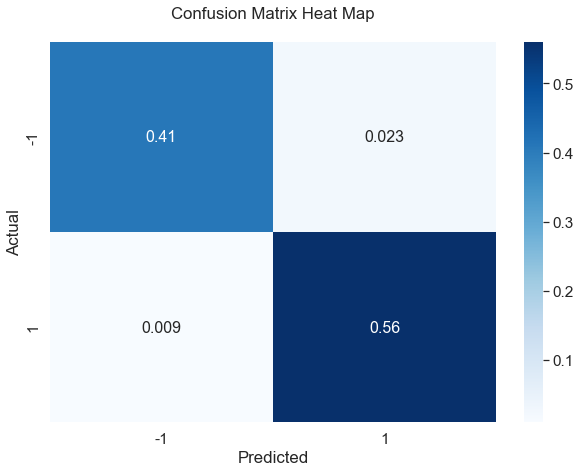

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plot.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plot.title("Confusion Matrix Heat Map\n")
plot.savefig('ConfusionMatrix_KNN', dpi=300, bbox_inches='tight')

In [34]:
target_names = ['Phishing', 'Legitimate']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Phishing       0.98      0.95      0.96      1428
  Legitimate       0.96      0.98      0.97      1889

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [35]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# False Positive Rate
fpr_rfc = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(fpr_rfc))

False Positive Rate : 0.0388


### Logistic Regression

In [36]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9222


In [37]:
%%time
from sklearn.model_selection import GridSearchCV
# Logistic Regression
param_grid = {
              "solver" : ['newton-cg', 'lbfgs', 'liblinear'],
              "penalty" : ['l2'],
              "C" : [100, 10, 1.0, 0.1, 0.01]
             }

lr = LogisticRegression()
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, verbose=True)
grid_search.fit(X_train, y_train)

lr_best = grid_search.best_estimator_

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.9300864054626026
Wall time: 4.46 s


In [38]:
y_pred = lr_best.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9225


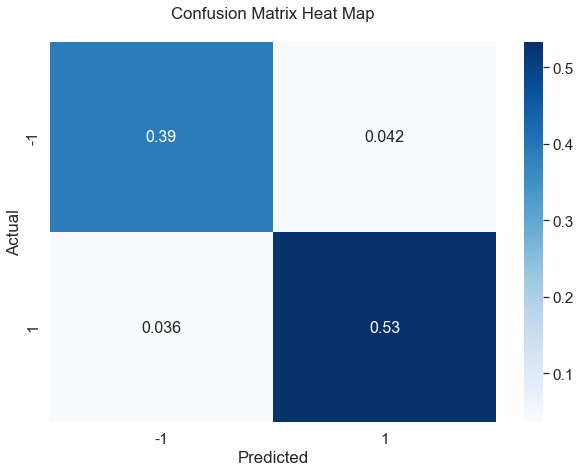

In [39]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
data = confusion_matrix(y_test, y_pred, normalize = 'all')
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plot.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size
plot.title("Confusion Matrix Heat Map\n")
plot.savefig('ConfusionMatrix_KNN', dpi=300, bbox_inches='tight')

In [40]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# False Positive Rate
fpr_lr = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(fpr_lr))

False Positive Rate : 0.0723


### Voting Classifier

In [41]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Random Forest', rfc_best), ('Decision Tree', dtc_best), ('K Neighbors', knc_best), ('Logistic Regression', lr_best),('Naive Bayes', gnb_best)]

vc = VotingClassifier(estimators = classifiers, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.1, 0.1))
vc.fit(X_train, y_train)
print(vc.score(X_train, y_train))
print(vc.score(X_test, y_test))
y_pred = vc.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

0.988239855259757
0.9596020500452216
Model accuracy score: 0.9596


In [42]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# False Positive Rate
fpr_vc = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(fpr_vc))

False Positive Rate : 0.0423


In [43]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Decision Tree', 'K Neighbors', 'Logistic Regression', 'Naive Bayes', 'Voting Classifier'],
    'Score' : [rfc_best.score(X_test, y_test), dtc_best.score(X_test, y_test), knc_best.score(X_test, y_test), lr_best.score(X_test, y_test), gnb_best.score(X_test, y_test), vc.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest,0.968345
5,Voting Classifier,0.959602
2,K Neighbors,0.953874
1,Decision Tree,0.953573
3,Logistic Regression,0.922520
4,Naive Bayes,0.897498


In [44]:
models = pd.DataFrame({
    'Model' : ['Random Forest', 'Decision Tree', 'K Neighbors', 'Logistic Regression', 'Naive Bayes', 'Voting Classifier'],
    'False Positive Rate' : [fpr_rfc, fpr_dtc, fpr_knn, fpr_lr, fpr_nb, fpr_vc]
})


models.sort_values(by = 'False Positive Rate', ascending = True)

,Model,False Positive Rate
0,Random Forest,0.038780
1,Decision Tree,0.040276
5,Voting Classifier,0.042254
2,K Neighbors,0.047445
3,Logistic Regression,0.072327
4,Naive Bayes,0.072808


In [45]:
import pickle
pickle.dump(rfc_best, open('VotingClassifiermodel.pkl', 'wb'))